In [16]:
import pandas as pd
financials = pd.read_pickle('dataset/financials.p')
movies = pd.read_pickle('dataset/movies.p')

the concept of 
.merge(how='')
https://shanelynnwebsite-mid9n9g1q9y8tt.netdna-ssl.com/wp-content/uploads/2017/03/join-types-merge-names.jpg

In [4]:
# 1. Counting missing rows with left join
# Merge the movies table with the financials table with a left join
movies_financials = movies.merge(financials, on='id', how='left')

# Count the number of rows in the budget column that are missing
number_of_missing_fin = movies_financials['budget'].isnull().sum()

# Print the number of movies missing financials
print(number_of_missing_fin)

1574


In [ ]:
# 2. Enriching a dataset
# Merge the toy_story and taglines tables with a inner join
toystory_tag = toy_story.merge(taglines, on='id')

# Print the rows and shape of toystory_tag
print(toystory_tag)
print(toystory_tag.shape)

In [ ]:
# 3. Right join to find unique movies
# Merge action_movies to the scifi_movies with right join
action_scifi = action_movies.merge(scifi_movies, on='movie_id', how='right',
                                   suffixes=('_act','_sci'))

# From action_scifi, select only the rows where the genre_act column is null
scifi_only = action_scifi[action_scifi['genre_act'].isnull()]

# Merge the movies and scifi_only tables with an inner join
movies_and_scifi_only = movies.merge(scifi_only, left_on='id', right_on='movie_id')

# Print the first few rows and shape of movies_and_scifi_only
print(movies_and_scifi_only.head())
print(movies_and_scifi_only.shape)

In [7]:
import matplotlib.pyplot as plt
movie_to_genres = pd.read_pickle('dataset/movie_to_genres.p')
pop_movies = pd.read_pickle('dataset/movies.p')

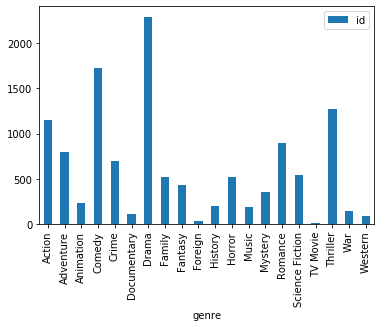

In [8]:
# 4.Popular genres with right join
# Use right join to merge the movie_to_genres and pop_movies tables
genres_movies = movie_to_genres.merge(pop_movies, how='right', 
                                      left_on='movie_id', 
                                      right_on='id')

# Count the number of genres
genre_count = genres_movies.groupby('genre').agg({'id':'count'})

# Plot a bar chart of the genre_count
genre_count.plot(kind='bar')
plt.show()

In [ ]:
# 5. Using outer join to select actors
# Merge iron_1_actors to iron_2_actors on id with outer join using suffixes
iron_1_and_2 = iron_1_actors.merge(iron_2_actors,
                                     on='id',
                                     how='outer',
                                     suffixes=('_1','_2'))

# Create an index that returns true if name_1 or name_2 are null
m = ((iron_1_and_2['name_1'].isnull()) | 
     (iron_1_and_2['name_2'].isnull()))

# Print the first few rows of iron_1_and_2
print(iron_1_and_2[m].head())

In [12]:
crews= pd.read_pickle('dataset/crews.p')
print(crews.head())
print(crews.shape)

      id  department             job               name
0  19995     Editing          Editor  Stephen E. Rivkin
2  19995       Sound  Sound Designer  Christopher Boyes
4  19995  Production         Casting          Mali Finn
6  19995   Directing        Director      James Cameron
7  19995     Writing          Writer      James Cameron
(42502, 4)


In [13]:
# 6. Self join
# Merge the crews table to itself
crews_self_merged = crews.merge(crews, on='id', how='inner',
                                suffixes=('_dir','_crew'))
print(crews_self_merged.head(10))
print(crews_self_merged.shape)
# Create a boolean index to select the appropriate rows
boolean_filter = ((crews_self_merged['job_dir'] == 'Director') & 
                  (crews_self_merged['job_crew'] != 'Director'))
direct_crews = crews_self_merged[boolean_filter]

# Print the first few rows of direct_crews
print(direct_crews.head())

      id department_dir job_dir           name_dir    department_crew  \
0  19995        Editing  Editor  Stephen E. Rivkin            Editing   
1  19995        Editing  Editor  Stephen E. Rivkin              Sound   
2  19995        Editing  Editor  Stephen E. Rivkin         Production   
3  19995        Editing  Editor  Stephen E. Rivkin          Directing   
4  19995        Editing  Editor  Stephen E. Rivkin            Writing   
5  19995        Editing  Editor  Stephen E. Rivkin                Art   
6  19995        Editing  Editor  Stephen E. Rivkin  Costume & Make-Up   
7  19995        Editing  Editor  Stephen E. Rivkin             Camera   
8  19995        Editing  Editor  Stephen E. Rivkin  Costume & Make-Up   
9  19995        Editing  Editor  Stephen E. Rivkin               Crew   

                  job_crew          name_crew  
0                   Editor  Stephen E. Rivkin  
1           Sound Designer  Christopher Boyes  
2                  Casting          Mali Finn  
3   

In [ ]:
# 7. Index merge for movie ratings
# Merge to the movies table the ratings table on the index
movies_ratings = movies.merge(ratings, left_index=True, right_index=True)

# Print the first few rows of movies_ratings
print(movies_ratings.head())

In [25]:
sequels = pd.read_pickle('dataset/sequels.p')
print(financials.head())
print(sequels.head())
print(sequels_fin.head())
print(sequels_fin.shape)

       id     budget       revenue
0   19995  237000000  2.787965e+09
1     285  300000000  9.610000e+08
2  206647  245000000  8.806746e+08
3   49026  250000000  1.084939e+09
4   49529  260000000  2.841391e+08
      id         title  sequel
0  19995        Avatar     NaN
1    862     Toy Story     863
2    863   Toy Story 2   10193
3    597       Titanic     NaN
4  24428  The Avengers     NaN
      id         title  sequel       budget       revenue
0  19995        Avatar     NaN  237000000.0  2.787965e+09
1    862     Toy Story     863   30000000.0  3.735540e+08
2    863   Toy Story 2   10193   90000000.0  4.973669e+08
3    597       Titanic     NaN  200000000.0  1.845034e+09
4  24428  The Avengers     NaN  220000000.0  1.519558e+09
(4803, 5)


In [24]:
# 8. Do sequels earn more?
# 找續作
# Merge sequels and financials on index id
sequels_fin = sequels.merge(financials, on='id', how='left')
# Self merge with suffixes as inner join with left on sequel and right on id
orig_seq = sequels_fin.merge(sequels_fin, how='inner', left_on='id', 
                             right_on='sequel', right_index=True,
                             suffixes=('_org','_seq'))
# Add calculation to subtract revenue_org from revenue_seq 
orig_seq['diff'] = orig_seq['revenue_seq'] - orig_seq['revenue_org']
print(orig_seq.shape)
print(orig_seq.head())
# Select the title_org, title_seq, and diff 
titles_diff = orig_seq[['title_org','title_seq','diff']]

# Print the first rows of the sorted titles_diff
print(titles_diff.sort_values(by='diff', ascending=False).head())

(878, 12)
     id  id_org                                      title_org  sequel_org  \
1   862     862                                      Toy Story         863   
2   863     863                                    Toy Story 2       10193   
3   597     597                                        Titanic         NaN   
13  122     122  The Lord of the Rings: The Return of the King         NaN   
18   58      58     Pirates of the Caribbean: Dead Man's Chest         NaN   

     budget_org   revenue_org  id_seq               title_seq  sequel_seq  \
1    30000000.0  3.735540e+08    2157           Lost in Space         NaN   
2    90000000.0  4.973669e+08   41439  Saw: The Final Chapter         NaN   
3   200000000.0  1.845034e+09     579                  Jaws 2         NaN   
13   94000000.0  1.118889e+09   49013                  Cars 2         NaN   
18  200000000.0  1.065660e+09     558            Spider-Man 2         NaN   

     budget_seq  revenue_seq          diff  
1    80000000